In [63]:
#imports

import tensorflow as tf
from tensorflow.keras import layers, Sequential
import matplotlib.pyplot as plt

In [62]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory='D:\\projects\\Garbage Classification\\Garbage',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(512, 384),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True
)

Found 2527 files belonging to 6 classes.


In [10]:
class_names = dataset.class_names
print(class_names)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [11]:
len(dataset)

79

In [14]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())


(32, 512, 384, 3)
[5 2 5 2 3 0 4 1 3 3 2 2 5 4 2 1 0 2 2 2 0 0 2 3 1 3 4 1 4 0 2 1]


In [15]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[255. 255. 251.]
  [255. 255. 251.]
  [255. 255. 251.]
  ...
  [211. 207. 195.]
  [211. 207. 195.]
  [211. 207. 195.]]

 [[255. 255. 251.]
  [255. 255. 251.]
  [255. 255. 251.]
  ...
  [211. 207. 195.]
  [211. 207. 195.]
  [211. 207. 195.]]

 [[255. 255. 251.]
  [255. 255. 251.]
  [255. 255. 251.]
  ...
  [211. 207. 195.]
  [211. 207. 195.]
  [211. 207. 195.]]

 ...

 [[226. 223. 206.]
  [226. 223. 206.]
  [226. 223. 206.]
  ...
  [196. 191. 171.]
  [196. 191. 171.]
  [196. 191. 171.]]

 [[226. 223. 206.]
  [226. 223. 206.]
  [226. 223. 206.]
  ...
  [196. 191. 171.]
  [196. 191. 171.]
  [196. 191. 171.]]

 [[226. 223. 206.]
  [226. 223. 206.]
  [226. 223. 206.]
  ...
  [196. 191. 171.]
  [196. 191. 171.]
  [196. 191. 171.]]]


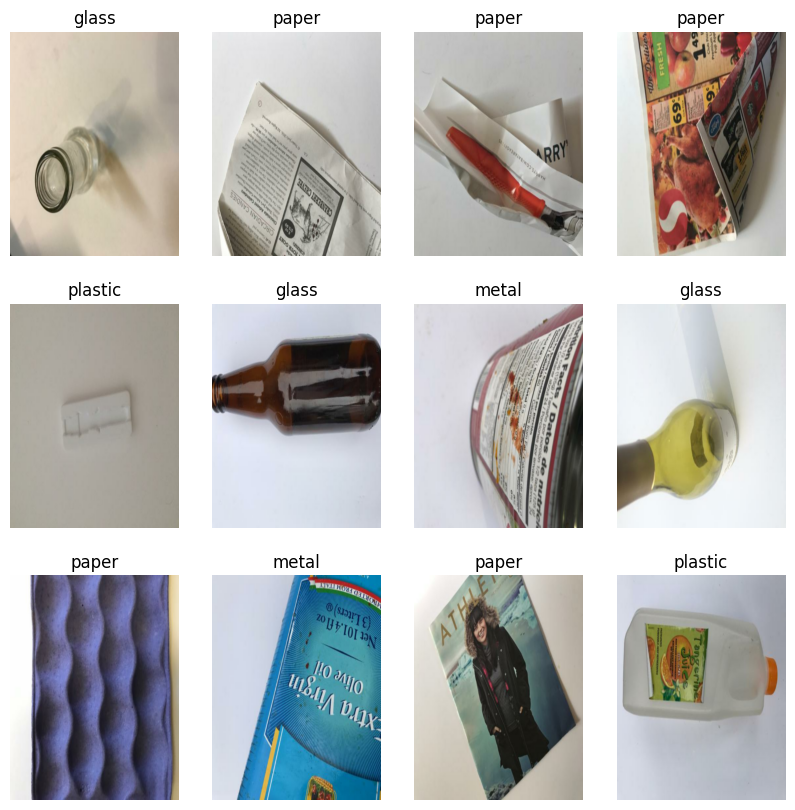

In [31]:
plt.figure(figsize=(10, 10))

for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

plt.show()

In [32]:
train_size  = 0.8
len(dataset) * train_size

63.2

In [35]:
train_ds = dataset.take(63)
len(train_ds)

63

In [37]:
test_ds = dataset.skip(63)
len(test_ds)

16

In [38]:
val_size = 0.1
len(dataset)*0.1 

7.9

In [41]:
val_ds = dataset.take(7)
len(val_ds)

7

In [42]:
test_ds = test_ds.skip(7)
len(test_ds)

9

In [52]:
def get_dataset_partitions(dataset, 
                           train_split=0.7, 
                           val_split=0.1, 
                           test_split=0.1, 
                           shuffle=True, 
                           shuffle_size=10000):

    dataset_size = len(dataset)

    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * dataset_size)
    val_size = int(val_split * dataset_size)

    train_ds = dataset.take(train_size)
    val_ds = dataset.skip(train_size).take(val_size)
    test_ds = dataset.skip(train_size + val_size)

    return train_ds, val_ds, test_ds
    

In [53]:
train_ds, val_ds, test_ds = get_dataset_partitions(dataset)

In [54]:
len(train_ds), len(val_ds), len(test_ds)

(55, 7, 17)

In [58]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [68]:
resize_and_rescale = Sequential([
    layers.Resizing(512, 384),
    layers.Rescaling(1.0/255)
])

In [70]:
data_arguments = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2) 
])